<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loss-Functions" data-toc-modified-id="Loss-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loss Functions</a></span><ul class="toc-item"><li><span><a href="#1.-Theory" data-toc-modified-id="1.-Theory-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Theory</a></span></li><li><span><a href="#2.-Application" data-toc-modified-id="2.-Application-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Application</a></span><ul class="toc-item"><li><span><a href="#2.1-Preprocessing" data-toc-modified-id="2.1-Preprocessing-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>2.1 Preprocessing</a></span></li><li><span><a href="#2.2-Modelling" data-toc-modified-id="2.2-Modelling-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>2.2 Modelling</a></span></li><li><span><a href="#Least-Squares-(MSE)-Loss" data-toc-modified-id="Least-Squares-(MSE)-Loss-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Least Squares (MSE) Loss</a></span></li><li><span><a href="#Mean-Absolute-Error-(MAE)-Loss" data-toc-modified-id="Mean-Absolute-Error-(MAE)-Loss-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Mean Absolute Error (MAE) Loss</a></span></li></ul></li><li><span><a href="#3.-Conclusion" data-toc-modified-id="3.-Conclusion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Conclusion</a></span></li></ul></li><li><span><a href="#🏁-Check-your-code" data-toc-modified-id="🏁-Check-your-code-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>🏁 Check your code</a></span></li></ul></div>

# Loss Functions

In this exercise, you will compare the effects of Loss functions on a linear regression model.

👇 Import the data from the attached csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
0,0.98,514.5,294.0,110.25,7.0,0.0,18.44
1,0.98,514.5,294.0,110.25,7.0,0.0,18.44
2,0.98,514.5,294.0,110.25,7.0,0.0,18.44
3,0.98,514.5,294.0,110.25,7.0,0.0,18.44
4,0.90,563.5,318.5,122.50,7.0,0.0,24.56


🎯 Your task is to predict the average temperature inside a greenhouse based on its design. Your temperature predictions will help you select the appropriate greenhouse design for each plant, based on their climatic needs. 

🌿 You know that plants can handle small temperature variations, but are exponentially more sensitive as the temperature variations increase. 

## 1. Theory 

❓ Theoretically, which Loss function would you train your model on to limit the risk of killing plants?

<details>
<summary> 🆘 Answer </summary>
    
By theory, you would use a Mean Square Error (MSE) Loss function. It would penalize outlier predictions and prevent your model from committing large errors. This would ensure smaller temperature variations and a lower risk for plants.

</details>

> YOUR ANSWER HERE
MSE

## 2. Application

### 2.1 Preprocessing

👇 Scale the features

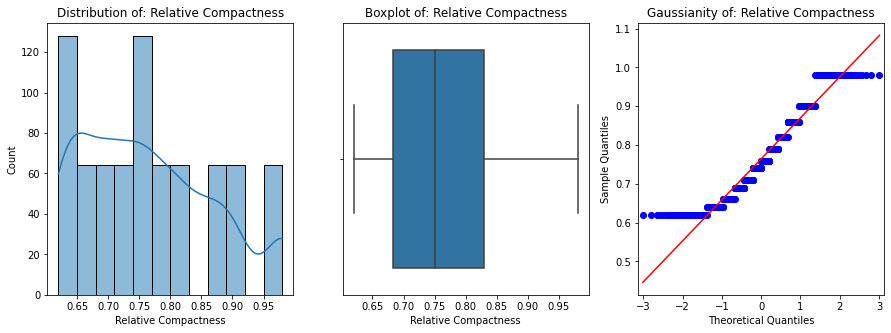

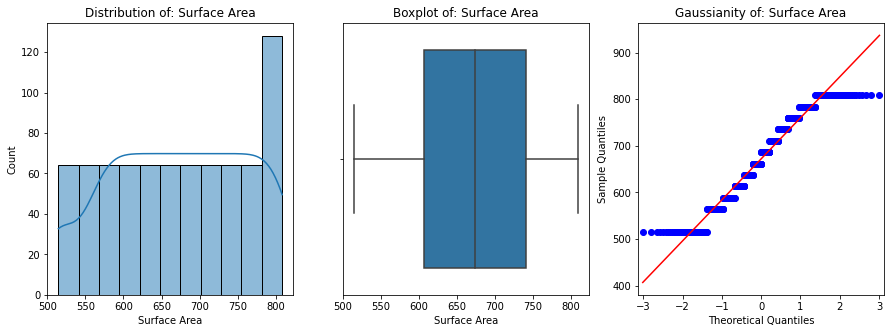

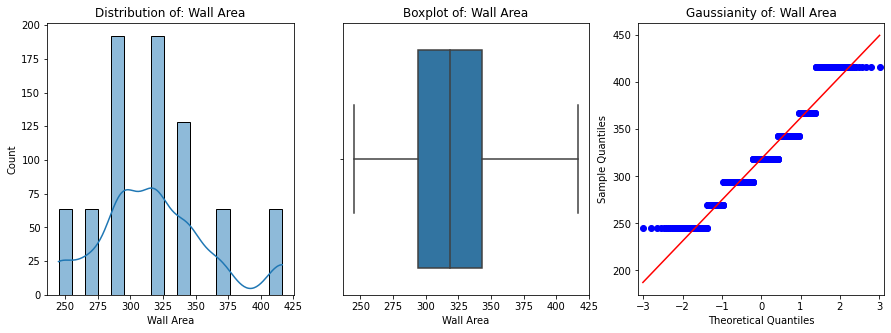

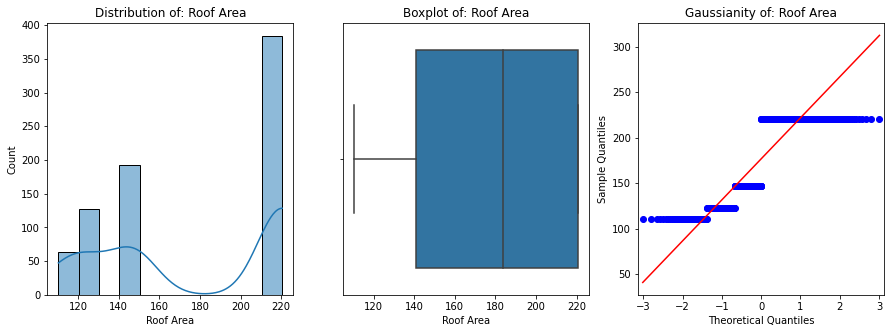

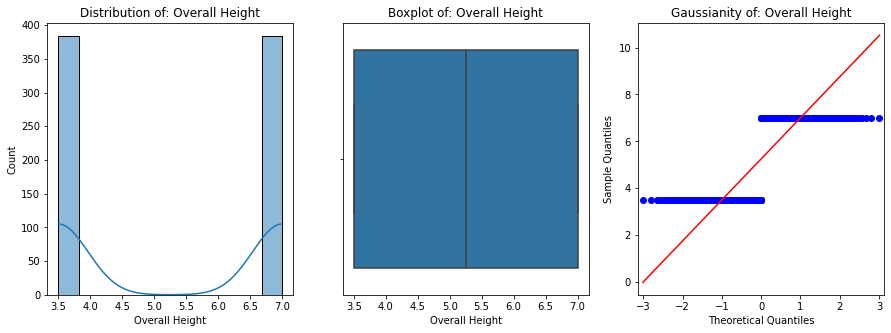

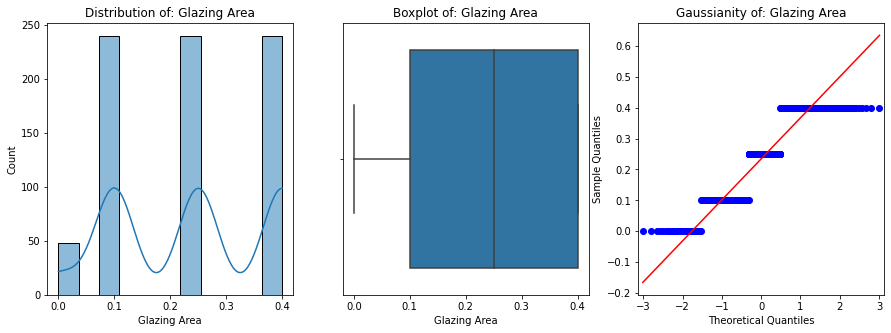

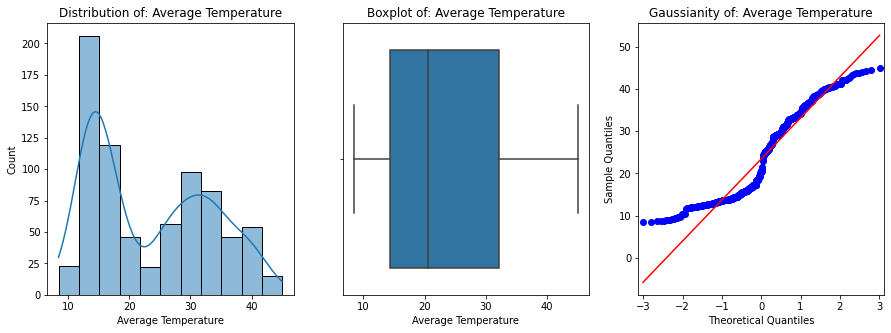

In [4]:
from toolkit.toolkit.useful_funcs import plot_dist_box_qq
plot_dist_box_qq(df)

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop("Average Temperature", axis=1)
y = df["Average Temperature"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [17]:
from sklearn.preprocessing import RobustScaler

rb = RobustScaler()
rb.fit(X_train)

X_scaled = rb.transform(X_train)

In [18]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5
0,-0.470588,0.500000,0.0,0.000000,0.0,-0.500000
1,0.294118,-0.333333,0.5,-1.000000,1.0,0.500000
2,0.705882,-0.666667,-0.5,-1.000000,1.0,0.500000
3,0.941176,-0.833333,0.0,-1.333333,1.0,-0.500000
4,-0.294118,0.333333,-0.5,0.000000,0.0,0.000000
...,...,...,...,...,...,...
532,-0.176471,0.166667,-1.0,0.000000,0.0,0.500000
533,0.000000,0.000000,-1.5,0.000000,0.0,-0.500000
534,1.411765,-1.166667,-0.5,-1.500000,1.0,0.500000
535,0.705882,-0.666667,-0.5,-1.000000,1.0,-0.500000


### 2.2 Modelling

In this section, you are going to verify the theory by evaluating models optimized on different Loss functions.

### Least Squares (MSE) Loss

👇 **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **Least Squares Loss** (MSE)



In [41]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

sgd_model = SGDRegressor(loss="squared_error")

cv = cross_validate(sgd_model, X_scaled, y_train, cv=10, scoring=["r2", "max_error"])
cv

{'fit_time': array([0.0175581 , 0.0123291 , 0.01054001, 0.01032495, 0.01026392,
        0.00971794, 0.00981379, 0.00722313, 0.01026106, 0.00936818]),
 'score_time': array([0.00240302, 0.00085092, 0.00103307, 0.00075293, 0.000772  ,
        0.00075984, 0.00067711, 0.00069475, 0.00073791, 0.00065684]),
 'test_r2': array([0.91055987, 0.90991995, 0.91348197, 0.89346782, 0.9210681 ,
        0.91441354, 0.88526684, 0.90681301, 0.84968261, 0.93870677]),
 'test_max_error': array([ -8.81059894,  -9.64504002,  -8.67136613, -10.13034497,
         -9.50877826,  -8.75732678,  -9.72108919,  -9.97286534,
         -9.60994789,  -5.73004655])}

👇 Compute 
- the mean cross validated R2 score `r2`
- the single biggest prediction error in °C of all your folds `max_error`?

(Tips: `max_error` is an accepted scoring metrics in sklearn)

In [42]:
max_error = abs(cv["test_max_error"]).max()
r2 = cv["test_r2"].mean()

In [43]:
r2, max_error

(0.9043380467970158, 10.130344968410654)

### Mean Absolute Error (MAE) Loss

What if we optimize our model on the MAE instead?

👇 **10-Fold Cross-validate** a Linear Regression model optimized by **Stochastic Gradient Descent** (SGD) on a **MAE** Loss

<details>
<summary>💡 Hints</summary>

- MAE loss cannot be directly specified in `SGDRegressor`. It must be engineered by adjusting the right parameters

</details>

In [36]:
sgd_model = SGDRegressor(loss="epsilon_insensitive", epsilon=0)

cv = cross_validate(sgd_model, X_scaled, y_train, cv=10, scoring=["r2", "max_error"])
cv

{'fit_time': array([0.00702   , 0.00541592, 0.00616813, 0.00648689, 0.00540805,
        0.00607491, 0.00527406, 0.00575638, 0.00602603, 0.00608301]),
 'score_time': array([0.00082207, 0.00088191, 0.00102496, 0.00080514, 0.00117087,
        0.00107908, 0.00086689, 0.00070572, 0.00089717, 0.00072002]),
 'test_r2': array([0.89731415, 0.88795344, 0.87781255, 0.8655263 , 0.88763343,
        0.87723108, 0.83854549, 0.88075931, 0.85144555, 0.91230875]),
 'test_max_error': array([-11.58537879, -10.91098888, -11.57723024, -11.44071038,
        -11.69053044, -11.52200883, -12.03007485, -12.44050453,
        -11.78333029,  -7.78171064])}

👇 Compute 
- the mean cross validated R2 score `r2_mae`
- the single biggest prediction error of all your folds `max_error_mae`?

In [37]:
max_error_mae = cv["test_max_error"].min()
r2_mae = cv["test_r2"].mean()

r2_mae, max_error_mae

(0.8776530058215857, -12.440504527228768)

## 3. Conclusion

❓Which of the models you evaluated seems the most appropriate for your task?

<details>
<summary> 🆘Answer </summary>
    
Although mean cross-validated r2 scores are approximately similar between the two models, the one optimized on a MAE has more chance to make larger mistakes from time to time, increasing risk of killing plants!

    
</details>

> YOUR ANSWER HERE

# 🏁 Check your code

In [38]:
from nbresult import ChallengeResult

result = ChallengeResult('loss_functions',
    r2 = r2,
    r2_mae = r2_mae,
    max_error = max_error,
    max_error_mae = max_error_mae,                     
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/Moe/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Moe/code/moe221/data-challenges-moe/05-ML/04-Under-the-hood/01-Loss-Functions
plugins: dash-2.0.0, anyio-3.3.2, cov-3.0.0
collecting ... collected 3 items

tests/test_loss_functions.py::TestLossFunctions::test_max_error_order PASSED [ 33%]
tests/test_loss_functions.py::TestLossFunctions::test_r2 PASSED          [ 66%]
tests/test_loss_functions.py::TestLossFunctions::test_r2_mae PASSED      [100%]

============================== 3 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/loss_functions.pickle

git commit -m 'Completed loss_functions step'

git push origin master
